In [1]:
import cv2
from keras.utils import Sequence
import pandas as pd
import sys
sys.path.append('../')
from model.model import vgg16Model, vqaModelBiLSTMFeatures
from utils.utils import *
from keras.models import model_from_json
from matplotlib import pyplot as plt

c:\users\vaibhav\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_vqa_model(model_path, weight_path):
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    print('Loaded Model')
    # load weights into new model
    loaded_model.load_weights(weight_path)
#     model = None
#     if model_name == 'vqaModelBiLSTMFeatures':
#         model = vqaModelBiLSTMFeatures(embedding_matrix, image_feature_dims=4096, trainable=False, num_classes=1000,embed_size=300, vocab_size=vocab_size, time_steps=20, unit_length=256, dropout=0.5)
    return loaded_model

In [3]:
def getImageFeatures(image, model):
    im = cv2.resize(image, (224,224))
    im = im.reshape((1,224,224,3))
    im = im/255.0
    features = model.predict(im)
    return features

In [4]:
def predictClass(question, image, time_steps):
    global tokenizer, le, vgg16, vgaModel
    image_features = getImageFeatures(image, vgg16)
    question_sequence, question_padded = createEncodedPaddedText(tokenizer, question,time_steps=time_steps)
    prediction = vqaModel.predict([np.asarray(question_padded), np.asarray(image_features)])
    answer_class = prediction.argmax(axis=1)
    answer = le.inverse_transform(answer_class)
    return answer

In [5]:
vgg16 = vgg16Model(1000)

In [ ]:
vqaModel = load_vqa_model('../extras/vqaModelBiLSTMFeatures.json', '../weights/best_weights.h5')

In [6]:
#Read tokenizer
tokenizer = readFromPickle('../extras/', 'tokenizer')
word_index = tokenizer.word_index
#Read label encoder
le = readFromPickle('../extras/', 'labelEncoder')
#Read embedding matrix
embedding_matrix = readFromH5Py('../dataset/', 'embedding_matrix_glove')

c:\users\vaibhav\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
vqaModel=vqaModelBiLSTMFeatures(embedding_matrix, image_feature_dims=4096, trainable=False, num_classes=1000,embed_size=300, vocab_size=len(word_index)+1, time_steps=20, unit_length=256, dropout=0.5)

In [8]:
vqaModel.load_weights('../weights/best_weights.h5')

In [15]:
image = cv2.imread('picnic.jpg')

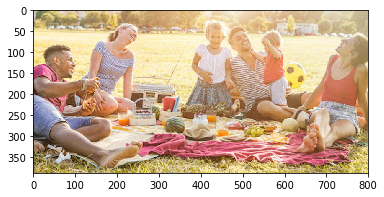

In [16]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [22]:
predictClass(['How many hens are there?'], image, time_steps=20)

c:\users\vaibhav\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['2'], dtype=object)